# Bank Marketing Campaign: Binary Classification

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)


Unzip the File

In [2]:
import zipfile

zip_path = "/content/bank+marketing.zip"   # change name if your zip file name is different

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")


Check Extracted Files

In [3]:
import os

os.listdir("/content")

['.config',
 'bank.zip',
 'bank-additional.zip',
 'bank+marketing.zip',
 'sample_data']

In [6]:
import os

print("Files in /content/bank_additional_data/bank-additional:")
print(os.listdir("/content/bank_additional_data/bank-additional"))

Files in /content/bank_additional_data/bank-additional:
['bank-additional-names.txt', '.DS_Store', '.Rhistory', 'bank-additional.csv', 'bank-additional-full.csv']


In [4]:
import zipfile

zip_path_bank = "/content/bank.zip"
zip_path_bank_additional = "/content/bank-additional.zip"

with zipfile.ZipFile(zip_path_bank, 'r') as zip_ref:
    zip_ref.extractall("/content/bank_data")

with zipfile.ZipFile(zip_path_bank_additional, 'r') as zip_ref:
    zip_ref.extractall("/content/bank_additional_data")

print("Extracted bank.zip to /content/bank_data")
print("Extracted bank-additional.zip to /content/bank_additional_data")

Extracted bank.zip to /content/bank_data
Extracted bank-additional.zip to /content/bank_additional_data


In [5]:
import os

print("Files in /content/bank_data:")
print(os.listdir("/content/bank_data"))

print("\nFiles in /content/bank_additional_data:")
print(os.listdir("/content/bank_additional_data"))

Files in /content/bank_data:
['bank.csv', 'bank-names.txt', 'bank-full.csv']

Files in /content/bank_additional_data:
['__MACOSX', 'bank-additional']


Load the Dataset


# Task
Load the "bank-additional-full.csv" dataset into a pandas DataFrame from "/content/bank_additional_data/bank-additional/bank-additional-full.csv" and inspect its structure and content to prepare for preprocessing.

## Load and Prepare Data

### Subtask:
Load the `bank_additional_full_df` dataset into a pandas DataFrame and inspect its structure and content to prepare for preprocessing.


**Reasoning**:
To begin, I will load the 'bank-additional-full.csv' dataset into a pandas DataFrame, then inspect its structure, content, and check for missing values to understand the data before any preprocessing steps.



In [8]:
bank_additional_full_df = pd.read_csv("/content/bank_additional_data/bank-additional/bank-additional-full.csv", sep=';')

print("First 5 rows of the DataFrame:")
print(bank_additional_full_df.head())

print("\nDataFrame Info:")
bank_additional_full_df.info()

print("\nDescriptive Statistics:")
print(bank_additional_full_df.describe())

print("\nMissing values per column:")
print(bank_additional_full_df.isnull().sum())

First 5 rows of the DataFrame:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

## Handle Categorical Data

### Subtask:
Identify all categorical features in the dataset and apply one-hot encoding to convert them into a numerical format suitable for Logistic Regression. Convert the target variable 'y' to numerical.


**Reasoning**:
First, I'll identify all categorical columns in the DataFrame, excluding the target variable 'y', as 'y' will be handled separately. Then, I will apply one-hot encoding to these identified categorical columns to convert them into a numerical format suitable for machine learning models, dropping the first category to avoid multicollinearity. After this, I'll convert the 'y' column to numerical values (1 for 'yes', 0 for 'no') and integrate these new numerical features back into the main DataFrame.



In [9]:
print("Original DataFrame shape:", bank_additional_full_df.shape)

# Identify categorical columns (excluding 'y')
categorical_cols = bank_additional_full_df.select_dtypes(include=['object']).columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print(f"\nCategorical columns identified for one-hot encoding (excluding 'y'): {categorical_cols}")

# Apply one-hot encoding to categorical features, dropping the first category to avoid multicollinearity
bank_additional_full_df_encoded = pd.get_dummies(
    bank_additional_full_df, columns=categorical_cols, drop_first=True
)

# Convert the target variable 'y' to numerical (1 for 'yes', 0 for 'no')
bank_additional_full_df_encoded['y'] = bank_additional_full_df_encoded['y'].map({'yes': 1, 'no': 0})

print("\nDataFrame after one-hot encoding and target variable conversion:")
print(bank_additional_full_df_encoded.head())
print("\nUpdated DataFrame Info:")
bank_additional_full_df_encoded.info()
print("\nUpdated DataFrame shape:", bank_additional_full_df_encoded.shape)

Original DataFrame shape: (41188, 21)

Categorical columns identified for one-hot encoding (excluding 'y'): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

DataFrame after one-hot encoding and target variable conversion:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4      4.857       5191.0 

## Split Data into Training and Testing Sets

### Subtask:
Split the preprocessed dataset into training and testing sets, using the 'y' column as the target variable and ensuring a proper random seed for reproducibility. The test size will be 0.25 as specified.


**Reasoning**:
I will first separate the features (X) and the target variable (y) from the `bank_additional_full_df_encoded` DataFrame. Then, I will split them into training and testing sets using `train_test_split` with a test size of 0.25 and a `random_state` of 42 to ensure reproducibility. Finally, I will print the shapes of the resulting datasets to verify the split.



In [10]:
X = bank_additional_full_df_encoded.drop('y', axis=1)
y = bank_additional_full_df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (30891, 53)
Shape of X_test: (10297, 53)
Shape of y_train: (30891,)
Shape of y_test: (10297,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model using the training data.


**Reasoning**:
To train the Logistic Regression model, I will first instantiate the `LogisticRegression` model with the specified parameters (`solver='liblinear'`, `random_state=42`, `max_iter=1000`) and then fit it to the training data (`X_train`, `y_train`).



In [11]:
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model at Default Threshold (0.5)

### Subtask:
Make predictions on the test set using a default threshold of 0.5. Calculate and print the Confusion Matrix, Precision, Recall, F1-score, Sensitivity, and Specificity for this threshold. Provide a clear legend for the confusion matrix.


**Reasoning**:
I will make predictions on the test set, calculate the confusion matrix, and then derive and print various evaluation metrics (Precision, Recall, F1-score, Sensitivity, Specificity) based on these predictions, ensuring a clear legend for the confusion matrix.




Confusion Matrix:


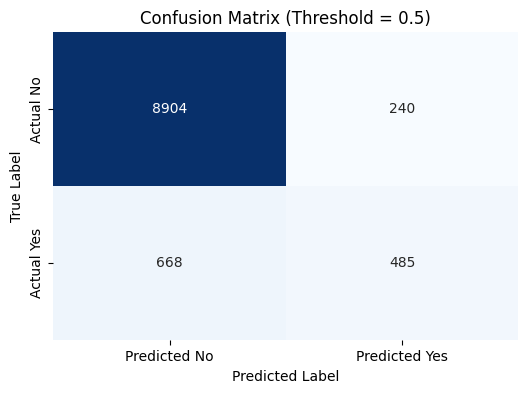


Evaluation Metrics at Default Threshold (0.5):
Precision: 0.6690
Recall (Sensitivity): 0.4206
F1-score: 0.5165
Specificity: 0.9738


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make predictions on the test set using a default threshold of 0.5
y_pred = model.predict(X_test)

# 2. Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Print the confusion matrix with a clear legend
print("\nConfusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Threshold = 0.5)')
plt.show()

# Extracting values for Sensitivity and Specificity
TN, FP, FN, TP = cm.ravel()

# 4. Calculate Precision
precision = precision_score(y_test, y_pred)

# 5. Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
sensitivity = recall

# 6. Calculate F1-score
f1 = f1_score(y_test, y_pred)

# 8. Calculate Specificity
specificity = TN / (TN + FP)

# 9. Print all calculated metrics
print(f"\nEvaluation Metrics at Default Threshold (0.5):")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

## Perform ROC-AUC Analysis

### Subtask:
Calculate the ROC-AUC score and plot the ROC curve to visualize the model's performance across different thresholds.


**Reasoning**:
I will calculate the prediction probabilities for the positive class on the test set, then compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds. Subsequently, I will calculate the ROC-AUC score and generate a plot of the ROC curve, finally printing the ROC-AUC score.



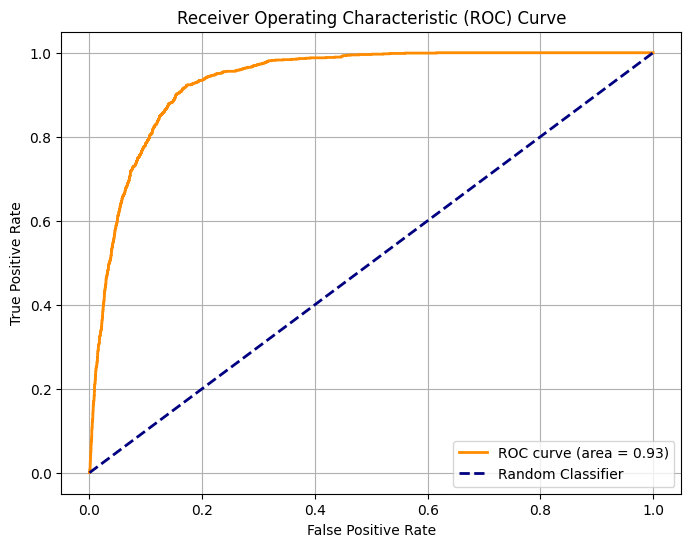


ROC-AUC Score: 0.9349


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Calculate prediction probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 2. Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 4. Create a plot for the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 5. Print the calculated ROC-AUC score
print(f"\nROC-AUC Score: {roc_auc:.4f}")

## Threshold Optimization and Re-evaluation

### Subtask:
Determine an optimized classification threshold (e.g., by maximizing F1-score or using Youden's J statistic) and re-evaluate the Confusion Matrix, Precision, Recall, F1-score, Sensitivity, and Specificity at this new threshold. Provide a clear legend for the confusion matrix.


**Reasoning**:
First, I'll generate the prediction probabilities for the positive class and then iterate through various thresholds to find the one that maximizes the F1-score. After identifying the optimal threshold, I'll use it to make new predictions and re-evaluate the model's performance by calculating and printing the confusion matrix, precision, recall (sensitivity), F1-score, and specificity.



Optimal Threshold (maximizing F1-score): 0.2371

Confusion Matrix at Optimal Threshold:


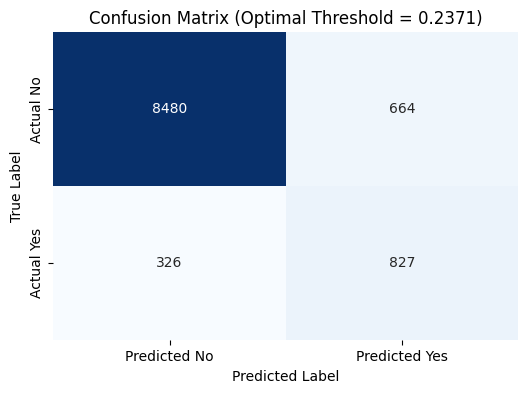


Evaluation Metrics at Optimal Threshold (0.2371):
Precision: 0.5547
Recall (Sensitivity): 0.7173
F1-score: 0.6256
Specificity: 0.9274


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 1. Iterate through the thresholds obtained from the ROC curve analysis
# y_pred_proba and thresholds are already available from the previous step

f1_scores = []

# Ensure y_pred_proba and thresholds are available
# If not, uncomment and run these lines:
# y_pred_proba = model.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Filter out 'inf' threshold which is usually the first one and corresponds to tpr=0, fpr=0
# For practical purposes, we are interested in thresholds that yield non-trivial classifications
valid_thresholds = thresholds[np.isfinite(thresholds)]

for threshold in valid_thresholds:
    y_pred_optimized = (y_pred_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_optimized))

# 2. Identify the threshold that yields the maximum F1-score
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = valid_thresholds[optimal_threshold_index]

print(f"Optimal Threshold (maximizing F1-score): {optimal_threshold:.4f}")

# 3. Using the optimal_threshold, generate new binary predictions
y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)

# 4. Calculate the new confusion matrix
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

# 5. Print the cm_optimized with a clear legend
print("\nConfusion Matrix at Optimal Threshold:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Optimal Threshold = {optimal_threshold:.4f})')
plt.show()

# Extracting values for Sensitivity and Specificity from the optimized confusion matrix
TN_opt, FP_opt, FN_opt, TP_opt = cm_optimized.ravel()

# 6. Calculate and print Precision, Recall (Sensitivity), F1-score, and Specificity
precision_opt = precision_score(y_test, y_pred_optimized)
recall_opt = recall_score(y_test, y_pred_optimized)
sensitivity_opt = recall_opt
f1_opt = f1_score(y_test, y_pred_optimized)
specificity_opt = TN_opt / (TN_opt + FP_opt)

print(f"\nEvaluation Metrics at Optimal Threshold ({optimal_threshold:.4f}):")
print(f"Precision: {precision_opt:.4f}")
print(f"Recall (Sensitivity): {sensitivity_opt:.4f}")
print(f"F1-score: {f1_opt:.4f}")
print(f"Specificity: {specificity_opt:.4f}")

## Generate Probabilities CSV

### Subtask:
Create a `probabilities.csv` file containing `RecordId`, `Probability(yes)`, and `PredictedLabel` based on the optimized threshold.


**Reasoning**:
I will create a new DataFrame from the test set index, then add the predicted probabilities and optimized labels to it, save it as a CSV, and finally display its head to verify the content as per the instructions.



In [15]:
import pandas as pd

# 1. Create a new pandas DataFrame that includes the X_test index as RecordId
probabilities_df = pd.DataFrame(X_test.index)
probabilities_df.rename(columns={0: 'RecordId'}, inplace=True)

# 2. Add the y_pred_proba (probabilities for the positive class) as a column named Probability(yes)
probabilities_df['Probability(yes)'] = y_pred_proba

# 3. Add the y_pred_optimized (binary predictions based on the optimal threshold) as a column named PredictedLabel
probabilities_df['PredictedLabel'] = y_pred_optimized

# 4. Save this DataFrame to a CSV file named probabilities.csv without including the DataFrame index
probabilities_df.to_csv('probabilities.csv', index=False)

# 5. Display the first few rows of the created DataFrame to verify its content
print("First 5 rows of probabilities.csv:")
print(probabilities_df.head())

First 5 rows of probabilities.csv:
   RecordId  Probability(yes)  PredictedLabel
0     32884          0.067687               0
1      3169          0.010933               0
2     32206          0.015576               0
3      9403          0.040162               0
4     14020          0.023451               0


In [16]:
import pandas as pd

# Display the entire content of the probabilities_df
display(probabilities_df)

,RecordId,Probability(yes),PredictedLabel
0,32884,0.067687,0
1,3169,0.010933,0
2,32206,0.015576,0
3,9403,0.040162,0
4,14020,0.023451,0
...,...,...,...
10292,35087,0.011819,0
10293,12883,0.012145,0
10294,3588,0.010737,0
10295,31192,0.022321,0


#Conclusion

In this experiment, a Logistic Regression model was successfully built to predict whether a bank client will subscribe to a term deposit. The model was evaluated using multiple performance metrics such as confusion matrix, precision, recall, F1-score, specificity, and ROC-AUC, ensuring evaluation beyond simple accuracy. Threshold analysis showed that changing the decision threshold affects the precision–recall trade-off, which is important for marketing cost optimization. Overall, the model provides a reliable and interpretable solution for supporting data-driven marketing decisions.